In [2]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
user_name = os.environ.get('DB_USER')
password = os.environ.get('DB_PASSWORD')
DB_NAME = 'BacterialGrowth'

# Database function: execute

In [267]:
def execute(phrase):
    """This function create a connection to the database and execute a command.
    :param phrase: str SQL sentence to execute
    :return: list of str received from the database after command execution.
    """
    try:
        cnx = mysql.connector.connect(user=user_name, password=password,host='localhost',database=DB_NAME)
        cnx.get_warnings = True
        cursor = cnx.cursor()
        cursor.execute(phrase)
        res = []
        for row in cursor:
            res.append(row)

        warnings = cursor.fetchwarnings()
        if warnings: 
            for i in range(len(warnings)):
                print("Warning - "+warnings[i][2])
        cursor.close()
        cnx.commit()
        cnx.close()
        return res
    except mysql.connector.Error as err:
        print("Something went wrong: {}".format(err))


In [269]:
def getRecords(table, field, args):
    where_clause = getWhereClause(args)
    phrase = "SELECT "+field+" FROM "+table+" "+where_clause
    res = execute(phrase)
    return res

In [268]:
def getFiles(field, args):
    where_clause = getWhereClause(args)
    phrase = "SELECT "+field+" FROM TechnicalReplicate "+where_clause
    res = execute(phrase)
    return res

In [273]:
def getWhereClause(args):
    clause = "WHERE ("
    for key, val in args.items():
        clause = clause + key + "= '" + str(val) + "' AND "
    clause = clause[:-5] + ')'
    return clause

# Abundance plot of bacteria in a single replicate


In [256]:
phrase = "SELECT abundanceFile FROM TechnicalReplicate WHERE abundanceFile = '/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/1/abundance_file.txt'"
phrase_met = "SELECT metabolitesFile FROM TechnicalReplicate WHERE metabolitesFile = '/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/1/metabolites_file.txt'"


In [257]:
res = execute(phrase)
res_met = execute(phrase_met)

In [258]:
res_met

[('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/1/metabolites_file.txt',)]

In [8]:
growth_df = pd.read_csv(res[0][0], sep=" ")
growth_df.head()

,time,OD,liquidtotalcount,liquidactivecount
0,0,0.014,4753,4109
1,4,0.024,17257,16616
2,8,0.211,228160,227030
3,12,0.657,763902,762292
4,16,0.868,1728989,1726829


In [259]:
metab_df = pd.read_csv(res_met[0][0], sep=" ")
metab_df.head()

,time,Glucose,Pyruvate,Succinate,Lactate,Formate,Acetate,Neu5Ac
0,0,7.60,7.94,0.61,0.58,1.57,2.17,1.29
1,4,7.53,7.96,0.66,0.58,1.78,2.23,1.27
2,8,6.89,8.21,1.22,0.62,2.32,3.12,1.26
3,12,4.42,7.14,3.78,1.32,3.80,6.07,1.28
4,16,1.44,3.55,6.17,2.98,2.92,9.52,1.27


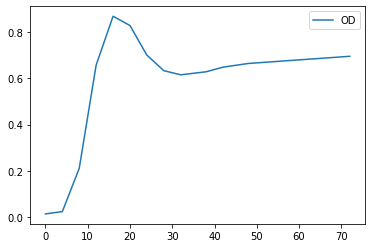

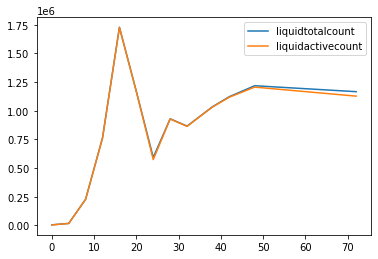

In [9]:
plt.plot('time', 'OD', data=growth_df, linestyle='-')
plt.legend()
plt.show()

plt.plot('time', 'liquidtotalcount', data=growth_df, linestyle='-')
plt.plot('time', 'liquidactivecount', data=growth_df, linestyle='-')
plt.legend()
plt.show()

In [10]:
def plotSeveralColumns(df):
    if len(df.columns) > 1:
        for column in df:
            if column != 'time':
                plt.plot('time', column, data=df, linestyle='-')
        plt.legend()
        plt.show()

In [11]:
def plotSeveralColumns(df, regex):
    
    headers = getMatchingList(regex, df)
    data = getIntersectionColumns(df, headers)
    
    if len(data.columns) > 1:
        for column in data:
            if column != 'time':
                plt.plot('time', column, data=data, linestyle='-')
        plt.legend()
        plt.show()

In [12]:
def getMatchingList (regex, lst):
    '''
    This function takes a regex expression and returns a list with all the matching words in the given lst
    '''
    res = []
    for word in lst:
        if regex.findall(word):
            res.append(word)
    return res

def getIntersectionColumns(df, columns):
    res = df[df.columns.intersection(columns)]
    return res

In [13]:
od_regex = re.compile(r'.*time.* | .*OD.*', flags=re.I | re.X)
count_regex = re.compile(r'.*time.* | .*count.*', flags=re.I | re.X)
qpcr_regex = re.compile(r'.*time.* | .*qpcr.*', flags=re.I | re.X)
rnaseq_regex = re.compile(r'.*time.* | .*rna.*', flags=re.I | re.X)

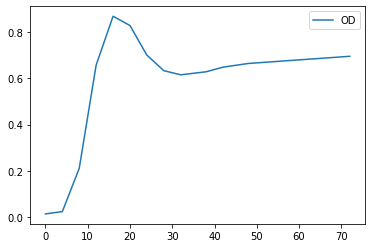

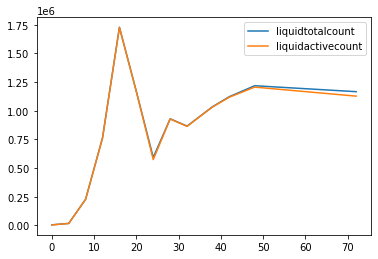

In [14]:
plotSeveralColumns(growth_df, od_regex)
plotSeveralColumns(growth_df, count_regex)
plotSeveralColumns(growth_df, qpcr_regex)
plotSeveralColumns(growth_df, rnaseq_regex)

## TO DO:
* Add title
* Add xlabel and ylabel

# Abundance plot of bacteria in a single experiment/perturbation (mean and standard deviation os a set of replicates) 

In [15]:
phrase_abundance = "SELECT abundanceFile FROM TechnicalReplicate WHERE perturbationId = '101.1'"
phrase_metabolites = "SELECT metabolitesFile FROM TechnicalReplicate WHERE perturbationId = '101.1'"

In [16]:
abundance_files = execute(phrase_abundance)
metabolites_files = execute(phrase_metabolites)

In [17]:
metabolites_files

[('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/1/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/2/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/3/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/4/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/5/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/6/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/7/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/8/metabolites_file.txt',),
 ('/Users/julia/bacterialGrowth_thesis/Data/experiments/101/101.1/9/metabolites_file.txt',)]

In [19]:
def getMeanStd(records, regex=''):
    record = pd.read_csv(records[0][0], sep=" ")
    if regex != '':
        headers = getMatchingList(regex, record)
    else:
        headers = record.columns
    
    dfs = pd.DataFrame(columns=range(1))
    dfs.set_axis(['time'], axis='columns', inplace=True)
    dfs['time'] = record['time']
    
    for header in headers:
        if header != 'time':
            df = pd.DataFrame(columns=range(len(records)+1)) #Each column will be the value of each record

            # Fill the df parsing all the records' files
            for i, record in enumerate(records, 1):
                record_df = pd.read_csv(record[0], sep=" ")
                df.iloc[:,i] = record_df[header]

            # Calculate and keep mean and std
            df_res = pd.DataFrame(columns=range(3))
            df_res.set_axis(['time', header+'_mean', header+'_std'], axis='columns', inplace=True)
            df_res['time'] = record_df['time']
            df_res[header+'_mean'] = df.iloc[:,1:].mean(axis=1, numeric_only=True)
            df_res[header+'_std'] = df.iloc[:,1:].std(axis=1, numeric_only=True)

            dfs = pd.merge(dfs, df_res, on='time')
    
    return dfs

In [20]:
def plotFigure(dfs):
    if len(dfs.columns) > 1:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_xlabel('time', fontsize = 16)
        ax.set_ylabel('abundance', fontsize = 16)

        cmap = plt.get_cmap(name='tab10')

        for i in range(1,len(dfs.columns),2):
            print(i)
            ax.errorbar(dfs.iloc[:,0], dfs.iloc[:,i], yerr = dfs.iloc[:,i+1], color = cmap(i-1))

        plt.show()

### Abundances

`regex = od_regex`

In [21]:
od_msd = getMeanStd(abundance_files, regex=od_regex)
count_msd = getMeanStd(abundance_files, regex=count_regex)
qpcr_msd = getMeanStd(abundance_files, regex=qpcr_regex)
rnaseq_msd = getMeanStd(abundance_files, regex=rnaseq_regex)

1


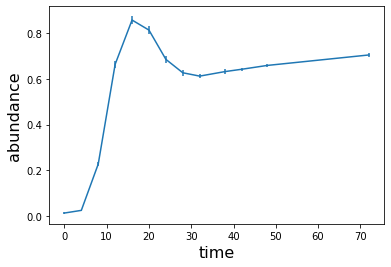

In [22]:
plotFigure(od_msd)

1
3


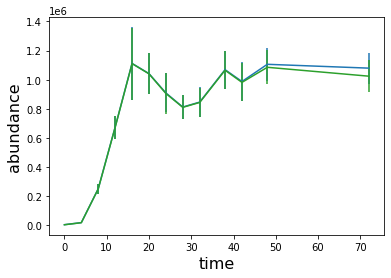

In [23]:
plotFigure(count_msd)

In [24]:
plotFigure(qpcr_msd)

### Metabolites
`regex = ''`

In [161]:
met_msd = getMeanStd(metabolites_files, regex='')

In [162]:
met_msd

,time,Glucose_mean,Glucose_std,Pyruvate_mean,Pyruvate_std,Succinate_mean,Succinate_std,Lactate_mean,Lactate_std,Formate_mean,Formate_std,Acetate_mean,Acetate_std,Neu5Ac_mean,Neu5Ac_std
0,0,7.580000,0.036742,7.972222,0.040859,0.624444,0.023511,0.564444,0.043333,1.631111,0.231703,2.181111,0.021473,1.282222,0.008333
1,4,7.533333,0.042720,7.982222,0.044659,0.647778,0.014814,0.575556,0.011304,1.770000,0.045000,2.240000,0.008660,1.274444,0.007265
2,8,6.817778,0.059325,8.228889,0.058405,1.316667,0.064031,0.616667,0.018708,2.477778,0.084080,3.223333,0.060415,1.263333,0.008660
3,12,4.271111,0.093601,6.860000,0.248345,3.822222,0.090523,1.276667,0.057009,3.120000,0.391280,6.211111,0.143653,1.268889,0.019003
4,16,1.354444,0.053877,3.303333,0.195959,6.291111,0.116022,3.067778,0.139712,2.965556,0.048247,9.657778,0.099093,1.267778,0.006667
5,20,0.218889,0.026194,1.204444,0.169640,7.871111,0.125344,3.924444,0.325811,2.976667,0.093808,11.683333,0.498071,1.262222,0.021082
6,24,0.148889,0.003333,0.860000,0.013229,8.731111,0.082832,3.778889,0.190095,2.956667,0.049244,12.103333,0.042131,1.270000,0.007071
7,28,0.136667,0.005000,0.821111,0.016159,9.033333,0.147479,3.700000,0.155804,2.968889,0.127715,12.246667,0.057228,1.274444,0.007265
8,32,0.137778,0.006667,0.794444,0.016667,9.144444,0.118122,3.748889,0.164503,2.931111,0.060300,12.235556,0.039087,1.280000,0.010000
9,38,0.141111,0.003333,0.766667,0.014142,9.226667,0.157242,3.750000,0.169189,2.944444,0.093423,12.222222,0.031136,1.333333,0.005000


1
3
5
7
9
11
13


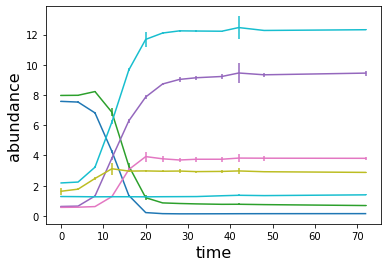

In [27]:
plotFigure(met_msd)

# One experiment and its perturbations. Mean and std over its replicates

In [28]:
def plotMeanStdSeveralReplicates():
    phrase_pert = "SELECT perturbationId FROM Perturbation WHERE experimentId = '101'"
    perturbations = execute(phrase_pert)

    od_total = []

    for i,pert in enumerate(perturbations):
        phrase_pert = "SELECT abundanceFile FROM TechnicalReplicate WHERE perturbationId = '"+pert[0]+"'"
        abundance_files = execute(phrase_pert)

        od_msd = getMeanStd(abundance_files, regex=od_regex)
        count_msd = getMeanStd(abundance_files, regex=count_regex)
        qpcr_msd = getMeanStd(abundance_files, regex=qpcr_regex)
        rnaseq_msd = getMeanStd(abundance_files, regex=rnaseq_regex)

        if i == 0:
            od_total = od_msd
        else:
            od_total = pd.merge(od_total, od_msd, on='time')

    return od_total

1
3


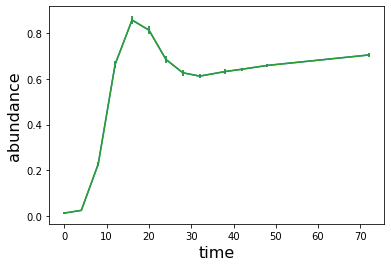

In [29]:
a = plotMeanStdSeveralReplicates()
plotFigure(a)

------------------------------------------------------------------------
# General function for both single dfs and dfs with mean and std

In [283]:
def prepareDf(options, data_type, args):
    '''
    This function prepares the df that is going to be plotted nad calls the function plotDf(df)
    
    * options: abundance/metabolites/ph
    * data_type: '' or meanstd (if it must call the function getMeanStd and plot with error bars)
    * args: arguments to call the database and obtain the files to be plotted
    '''
    abundance_options = ['od', 'counts', 'qpcr', 'rnaseq']
    # Abundance file
    # =====================================================================================
    if 'abundance' in options:
        files = db.getFiles('abundanceFile', args)
        
        for opt in abundance_options:
            if data_type == 'meanstd':
                regex = (globals()['%s_regex' % opt])
                df = getMeanStd(files, regex=regex)
            else:
                df = pd.read_csv(files[0][0], sep=" ")
                regex = (globals()['%s_regex' % opt])
                headers = getMatchingList(regex, df)
                df = getIntersectionColumns(df, headers)
                
            # df comes from the if or the else
            if len(df.columns) > 1:
                fig = plt.figure()
                ax = fig.add_subplot()
                plotDf(df, ax)
                plt.show()

    # Metabolites file
    # =====================================================================================
    if 'metabolites' in options:
        files = db.getFiles('metabolitesFile', args)

        if 'meanstd':
            df = getMeanStd(files, regex='')
        else:
            df = pd.read_csv(files[0][0], sep=" ")
        
        fig = plt.figure()
        ax = fig.add_subplot()
        plotDf(df, ax)
        plt.show()

    # pH file
    # =====================================================================================
    if 'ph' in options:
        files = db.getFiles('phFile', args)

        if 'meanstd':
            df = getMeanStd(files, regex='')
        else:
            df = pd.read_csv(files[0][0], sep=" ")
        
        fig = plt.figure()
        ax = fig.add_subplot()
        plotDf(df, ax)
        plt.show()

In [284]:
def plotDf(df, ax):
    cmap = plt.get_cmap(name='tab10')
    msd_regex = re.compile(r'.*mean.* | .*std.*', flags=re.I | re.X)
    
    if len(getMatchingList(msd_regex, df)) > 0:
        vec = range(1,len(df.columns),2)
        for i in vec:
            ax.errorbar(df.iloc[:,0], df.iloc[:,i], yerr = df.iloc[:,i+1], color = cmap(i-1), label=df.columns[i][:-5])
    else:
        vec = range(1,len(df.columns))
        for i in vec:
            ax.plot(df.iloc[:,0], df.iloc[:,i], linestyle='-', color = cmap(i-1), label=df.columns[i])

## SINGLE DF
### Single df without mean and standard deviation

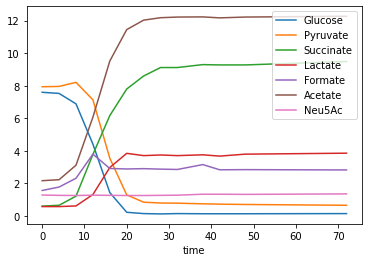

In [285]:
#df = growth_df[['time', 'liquidtotalcount', 'liquidactivecount']]
df = metab_df

if len(df.columns) > 1:
    fig = plt.figure()
    ax = fig.add_subplot()
    plotDf(df, ax)
    legend = ax.legend(loc='upper right')
    ax.set_xlabel('time')

### Single df with mean and standard deviation

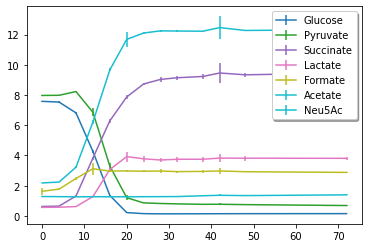

In [286]:
df = met_msd

if len(df.columns) > 1:
    fig = plt.figure()
    ax = fig.add_subplot()
    plotDf(df, ax)
    legend = ax.legend(loc='upper right', shadow=True)

# SEVERAL DFS
### Several dfs without mean and standard deviation

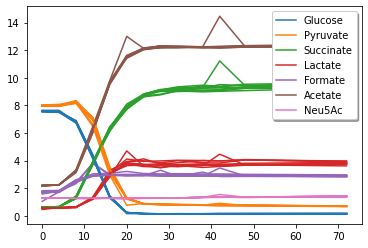

In [287]:
met_files = metabolites_files[0:2]
met_files = metabolites_files

fig = plt.figure()
ax = fig.add_subplot()

for i,file in enumerate(met_files):
    df = pd.read_csv(metabolites_files[i][0], sep=" ")
    if len(df.columns) > 1:
        plotDf(df, ax)
    if i == 0:
        legend = ax.legend(loc='upper right', shadow=True)

### Several dfs with mean and standard deviation

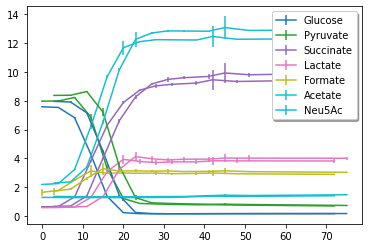

In [288]:
met_msd_mod = met_msd.copy()
met_msd_mod.iloc[:,0] = met_msd_mod.iloc[:,0]+3
met_msd_mod.iloc[:,1:] = (met_msd_mod.iloc[:,1:]*1.05)
met_data = ['met_msd', 'met_msd_mod']

fig = plt.figure()
ax = fig.add_subplot()

for i,df in enumerate(met_data):
    df = (globals()['%s' % df])
    plotDf(df, ax)
    
    if i == 0:
        legend = ax.legend(loc='upper right', shadow=True)

#ax.set_xlabel('time', fontsize = 16)
#ax.set_ylabel('metabolites', fontsize = 16)
#plt.show()

# Collapse function

In [ ]:
df = metab_df
df = met_msd
met_files = metabolites_files #loop
met_data = ['met_msd', 'met_msd_mod'] #several msd

In [303]:
def prepareDf_2(field, args):
    '''
    field: abundance/metabolites/ph
    args: arguments to call the database and get path to files 
    '''
    db_field = field+'File'
    files = getFiles(db_field, args)
    
    if len(files) == 1:
        # ABUNDANCES ========================================================================
        if field == 'abundance':
            abundance_options = ['od', 'counts', 'qpcr', 'rnaseq']
            for opt in abundance_options:
                df = pd.read_csv(files[0][0], sep=" ")
                regex = (globals()['%s_regex' % opt])
                headers = getMatchingList(regex, df)
                df = getIntersectionColumns(df, headers)
                
                # plot df 
                if len(df.columns) > 1:
                    fig = plt.figure()
                    ax = fig.add_subplot()
                    plotDf(df, ax)
                    plt.show()
        
        # PH OR METABOLITES ==================================================================
        else:
            df = pd.read_csv(files[0][0], sep=" ")  
            
            # plot df 
            if len(df.columns) > 1:
                fig = plt.figure()
                ax = fig.add_subplot()
                plotDf(df, ax)
                plt.show()
    else:
        # ABUNDANCES ========================================================================
        if field == 'abundance':
            print('several abundances')
            print('\t All of them?')
            print('\t Mean and standard deviation of all of them? ==> if records are from same experiment/perturbation')
            print('\t Mean and standard deviation but still several? ==> several perturbations')
        # PH OR METABOLITES ==================================================================
        else:
            print('several ph or metabolites')
            print('\t All of them?')
            print('\t Mean and standard deviation of all of them? ==> if records are from same experiment/perturbation')
            print('\t Mean and standard deviation but still several? ==> several perturbations')

In [304]:
args_1 = {'replicateId': '101.1_1'}
args_2 = {'perturbationId': '101.1'}
args_31 = {'experimentId': '101'}
perturbation_ids = getRecords('Perturbation', 'perturbationId', args_31)
for i,perturbation in enumerate(perturbation_ids):
    args_32 = {'perturbationId': perturbation[0]}
        
print('='*20)
prepareDf_2('abundance', args_1)
print('='*20)
prepareDf_2('abundance', args_2)
print('='*20)
prepareDf_2('metabolites', args_2)
print('='*20)
prepareDf_2('abundance', args_32)

One abundance
several abundances
	 All of them?
	 Mean and standard deviation of all of them? ==> if records are from same experiment/perturbation
	 Mean and standard deviation but still several? ==> several perturbations
several ph or metabolites
	 All of them?
	 Mean and standard deviation of all of them? ==> if records are from same experiment/perturbation
	 Mean and standard deviation but still several? ==> several perturbations
several abundances
	 All of them?
	 Mean and standard deviation of all of them? ==> if records are from same experiment/perturbation
	 Mean and standard deviation but still several? ==> several perturbations
